#Taller 1 
**UNIVERSIDAD EXTERNADO DE COLOMBIA**            
Finanzas computacionales                        

*   Samantha Ávila 
*   María Paula Vargas (105)




**1. Escoja dos acciones de su preferencia en el mercado estadounidense. Para estas dos acciones descargue las series de precios diarios para el periodo Ene-21 a Dic-2022 usando pandas datareader. Con esta información:**

  a. Calcule los retornos logarítmicos diarios,     mensuales y anualizados. Presente los 
  resultados en una tabla.
  



In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
!pip install --quiet yfinance 
import yfinance as yf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 11.2 MB/s eta 0:00:00


In [ ]:
from pandas_datareader import data as wb
from datetime import datetime

In [ ]:
yf.pdr_override()

In [ ]:
#Acciones Ralph Lauren y Victoria´s Secret 
activos = ["RL", "VSCO"]  
p_diarios =wb.get_data_yahoo(activos,start="2021-01-01",end="2022-12-31")["Adj Close"] 
r_diarios = np.log(p_diarios/p_diarios.shift(1)).dropna()


[*********************100%***********************]  2 of 2 completed


In [ ]:
#Retornos diarios 
r_diarios.mean()

RL     -0.000011
VSCO   -0.000472
dtype: float64

In [ ]:
#Retornos mensuales
r_diarios.mean()*21

RL     -0.000224
VSCO   -0.009903
dtype: float64

In [ ]:
#Retornos anualizados 
r_diarios.mean()*252

RL     -0.002691
VSCO   -0.118830
dtype: float64

In [ ]:
#Tabla de retornos
tabla_retornos={"Accion":["RL","VSCO"],
               "R_log_diarios":[r_diarios["RL"].mean(),r_diarios["VSCO"].mean()],
               "R_log_mensuales":[r_diarios["RL"].mean()*21,r_diarios["VSCO"].mean()*21],
               "R_log_anualizados":[r_diarios["RL"].mean()*252,r_diarios["VSCO"].mean()*252]}
Acciones=pd.DataFrame(tabla_retornos,index=["RL","VSCO"])
Acciones

,Accion,R_log_diarios,R_log_mensuales,R_log_anualizados
RL,RL,-0.000011,-0.000224,-0.002691
VSCO,VSCO,-0.000472,-0.009903,-0.118830


b. Calcule los retornos esperados y volatilidades anualizadas.



In [ ]:
#Retornos esperados
r_diarios.mean()*252

RL     -0.002691
VSCO   -0.118830
dtype: float64

In [ ]:
#Volatilidades anualizadas 
r_diarios.std()*np.sqrt(252)

RL      0.426685
VSCO    0.636513
dtype: float64

c. Construya una tabla resumen con las estadísticas descriptivas de las series diarias (media, mediana, desv. estándar, curtosis, simetría) de los dos activos.




In [ ]:
#Media
r_diarios.mean()

RL     -0.000011
VSCO   -0.000472
dtype: float64

In [ ]:
#Mediana
r_diarios.median()

RL      0.001409
VSCO   -0.001336
dtype: float64

In [ ]:
#Desviacion estandar 
r_diarios.std()

RL      0.026879
VSCO    0.040097
dtype: float64

In [ ]:
#Curtosis
r_diarios.kurt()

RL      2.064187
VSCO    4.954630
dtype: float64

In [ ]:
#Simetria
r_diarios.skew()

RL     -0.519495
VSCO    0.818455
dtype: float64

In [ ]:
#Tabla estadistica 
tabla_estadistica={"Accion":["RL","VSCO"],
               "Media":[r_diarios["RL"].mean(),r_diarios["VSCO"].mean()],
               "Mediana":[r_diarios["RL"].median(),r_diarios["VSCO"].median()],
               "Desviación.E":[r_diarios["RL"].std(),r_diarios["VSCO"].std()],
               "Curtosis":[r_diarios["RL"].kurt(),r_diarios["VSCO"].kurt()],
                "Simetría":[r_diarios["RL"].skew(),r_diarios["VSCO"].skew()]}
Acciones1=pd.DataFrame(tabla_estadistica,index=["RL","VSCO"])
Acciones1

,Accion,Media,Mediana,Desviación.E,Curtosis,Simetría
RL,RL,-0.000011,0.001409,0.026879,2.064187,-0.519495
VSCO,VSCO,-0.000472,-0.001336,0.040097,4.954630,0.818455


d. Compare las distribuciones empíricas de los dos activos con la distribución teórica normal.


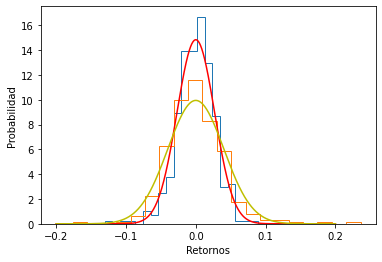

In [ ]:
# Rl- Azul empirica y Roja Teorica 
# VSCO - Naranja empirica y Amarilla Teorica 
x= np.linspace(-0.2,0.2,num=1000) 
plt.hist(r_diarios["RL"],density=True,histtype="step",bins=20);
plt.hist(r_diarios["VSCO"],density=True,histtype="step",bins=20);
plt.xlabel("Retornos")
plt.ylabel("Probabilidad")
plt.plot(x,norm.pdf(x,scale=r_diarios["RL"].std()),"r")
plt.plot(x,norm.pdf(x,scale=r_diarios["VSCO"].std()),"y")
plt.show();

e. Calcule la matriz de correlaciones de Pearson, rango de Kendall y de Spearman.


In [ ]:
#Pearson
r_diarios.corr()

,RL,VSCO
RL,1.000000,0.544713
VSCO,0.544713,1.000000


In [ ]:
#Kendall 
import scipy.stats as stats
stats.kendalltau(r_diarios["RL"],r_diarios["VSCO"])

KendalltauResult(correlation=0.3777990200244003, pvalue=4.5177836602348886e-27)

In [ ]:
#Spearman
stats.spearmanr(r_diarios["RL"],r_diarios["VSCO"])

SpearmanrResult(correlation=0.5380091047404221, pvalue=8.954289200837004e-29)

**2. Escoja 10 acciones de su preferencia en el mercado estadounidense. Para estas 
acciones descargue las series de precios mensuales para el periodo Dic-17 a Dic-2022. 
Con esta información:**

a. Calcule los retornos y volatilidades anualizadas. 


In [ ]:
acciones=['MCD','DPZ','DIN','EAT','DIS','KO','WMT','TGT','NKE','DECK']
precios=yf.download(acciones,start='2017-12-01',end='2022-12-01')['Adj Close'].dropna()
retorno=np.log(precios/precios.shift(1)).dropna()
sigma=retorno.std()
sigma*np.sqrt(252)

[*********************100%***********************]  10 of 10 completed


DECK    0.434999
DIN     0.685631
DIS     0.325244
DPZ     0.322341
EAT     0.666708
KO      0.216897
MCD     0.239899
NKE     0.328207
TGT     0.349988
WMT     0.234697
dtype: float64

In [ ]:
sigma*np.sqrt(21)

DECK    0.125573
DIN     0.197925
DIS     0.093890
DPZ     0.093052
EAT     0.192462
KO      0.062613
MCD     0.069253
NKE     0.094745
TGT     0.101033
WMT     0.067751
dtype: float64

b. Construya una tabla en la que se muestre un ranqueo de los activos de acuerdo con su 
retorno esperado.

In [ ]:
retornos_esperados=(sigma*np.sqrt(252)).sort_values()
retornos_esperados

df=pd.DataFrame(retornos_esperados)
df

,0
KO,0.216897
WMT,0.234697
MCD,0.239899
DPZ,0.322341
DIS,0.325244
NKE,0.328207
TGT,0.349988
DECK,0.434999
EAT,0.666708
DIN,0.685631


**3. Descargue la serie mensual de precios del índice estadounidense Rusell para el periodo 
Dic-11 a Dic-2022. Con esta información calcule la volatilidad mensual y anualizada usando 
las siguientes medidas:**





In [ ]:
index=["^RUT"]
dfm= wb.get_data_yahoo(index,start="2011-12-31",end="2022-12-31",interval="1mo")
dfm

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-01,750.700012,800.219971,736.780029,792.820007,792.820007,79567560000
2012-02-01,796.989990,833.020020,796.989990,810.940002,810.940002,78385710000
2012-03-01,813.969971,847.919983,785.409973,830.299988,830.299988,83899660000
2012-04-01,828.890015,841.059998,783.559998,816.880005,816.880005,74761710000
2012-05-01,817.700012,830.099976,745.710022,761.820007,761.820007,86920490000
...,...,...,...,...,...,...
2022-08-01,1870.489990,2030.050049,1843.079956,1844.119995,1844.119995,92252350000
2022-09-01,1826.750000,1906.089966,1650.709961,1664.719971,1664.719971,94241020000
2022-10-01,1687.280029,1854.569946,1641.939941,1846.859985,1846.859985,95823760000


In [ ]:
retorno1= np.log(dfm["Adj Close"]/dfm["Adj Close"].shift(1)).dropna()

In [ ]:
#Retorno mensual 
retorno_men=retorno1.mean()
retorno_men

0.00609299881094452

In [ ]:
#Retorno anual
retorno_anu=retorno1.mean()*12
retorno_anu

0.07311598573133424

a. Desviación estándar

In [ ]:
#Vol. mensual estándar
retorno1.std()

0.054690663898147106

In [ ]:
#Vol. anualizada estándar
retorno1.std()*np.sqrt(12)

0.18945401714252746

b. Parkinson

In [ ]:
#Vol. mensual Parkinson
lnHL = np.log(dfm["High"]/dfm["Low"]).dropna()  
sigmaPark_d = ((1/(4*np.log(2)))*lnHL**2)**0.5
sigmaPark_d.mean()


0.05110282355923833

In [ ]:
#Vol anualizada Parkinson
(sigmaPark_d.mean())*np.sqrt(12)

0.17702537362965717

c. Garman-Klass 



In [ ]:
#Vol. mensual Garman-Klass
lnHL = np.log(dfm["High"]/dfm["Low"]).dropna()
lnCO = np.log(dfm["Close"]/dfm["Open"]).dropna()
sigmaGK_d = (0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)**0.5
sigmaGK_d.mean()

0.05244964972327022

In [ ]:
#Vol.anualizada Garman- Klass
sigmaGK_d.mean()*np.sqrt(12)

0.18169091631978984

d. Volatilidad ponderada exponencial (EWMA) con una lambda de 0.94.

In [ ]:
def vol_ewma(retorno1,Lambda):                
  k=len(retorno1)                  
  td=np.arange(k-1,-1,-1)
  alpha= Lambda**td            
  var_s=(retorno1**2*alpha).sum()*(1-Lambda)  
  vol_d=np.sqrt(var_s)  
  return (vol_d)

In [ ]:
#Vol. mensual EWMA 
vol_ewma(retorno1,Lambda=0.94)

0.06830708248540157